In [16]:
import pandas as pd
import numpy as np
import os
import json
import altair as alt
%matplotlib inline
import numpy as np
import networkx as nx
#import altair as alt
import nx_altair as nxa
import matplotlib.pyplot as plt

In [17]:
JSON_FILE = os.path.join("..", 
                         "results", 
                         "mammalian_REM2", 
                         "mammalian_REM2_codons.SA.FilterOutliers.fasta.BGM.json")


posteriorThreshold = 0.5

print(JSON_FILE)

../results/mammalian_REM2/mammalian_REM2_codons.SA.FilterOutliers.fasta.BGM.json


In [18]:
def getBGMData(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["MLE"]["content"]
#end method

def getBGMHeaders(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["MLE"]["headers"]
#end method

def getBGMInput(json_file):
    with open(json_file, "r") as in_d:
        json_data = json.load(in_d)
    return json_data["input"]
#end method

In [19]:
columns = getBGMHeaders(JSON_FILE)
headers = [x[0] for x in columns]

# For FUBAR
#headers.append("Z")
#headers.append("Y")
#headers

headers2= []
for item in headers:
    item = item.replace('â€“', "-")
    headers2.append(item)
headers2

['Site 1',
 'Site 2',
 'P [Site 1 –> Site 2]',
 'P [Site 2 –> Site 1]',
 'P [Site 1 <–> Site 2]',
 'Site 1 subs',
 'Site 2 subs',
 'Shared subs']

### Selected Sites

In [20]:
df = pd.DataFrame(getBGMData(JSON_FILE), columns=headers2, dtype = float)
#df.drop('Z', axis=1, inplace=True)
#df.drop('Y', axis=1, inplace=True)

#df["omega"] = df["beta"] / df["alpha"]

df.index += 1
#df["Site"] = df.index

df

,Site 1,Site 2,P [Site 1 –> Site 2],P [Site 2 –> Site 1],P [Site 1 <–> Site 2],Site 1 subs,Site 2 subs,Shared subs
1,1.0,2.0,0.001039,0.002052,0.003092,1.0,3.0,0.0
2,1.0,4.0,0.000983,0.000760,0.001743,1.0,9.0,0.0
3,1.0,5.0,0.003192,0.002074,0.005266,1.0,2.0,0.0
4,1.0,6.0,0.000912,0.000500,0.001411,1.0,12.0,0.0
5,1.0,9.0,0.000568,0.001377,0.001945,1.0,6.0,0.0
...,...,...,...,...,...,...,...,...
32892,623.0,626.0,0.002408,0.001941,0.004349,1.0,2.0,0.0
32893,623.0,627.0,0.213899,0.102530,0.316429,1.0,3.0,1.0
32894,625.0,626.0,0.000316,0.000793,0.001109,13.0,2.0,0.0
32895,625.0,627.0,0.000273,0.000486,0.000759,13.0,3.0,0.0


In [21]:
df.columns

Index(['Site 1', 'Site 2', 'P [Site 1 –> Site 2]', 'P [Site 2 –> Site 1]',
       'P [Site 1 <–> Site 2]', 'Site 1 subs', 'Site 2 subs', 'Shared subs'],
      dtype='object')

In [22]:
df.columns[2]

'P [Site 1 –> Site 2]'

## Coevolving sites

In [23]:
#coevolving_sites_1 = df[df["P [Site 1 -> Site 2]"] >= posteriorThreshold]
coevolving_sites_1 = df[df[df.columns[2]] >= posteriorThreshold]

coevolving_sites_2 = df[df[df.columns[3]] >= posteriorThreshold]

coevolving_sites_3 = df[df[df.columns[4]] >= posteriorThreshold]

In [24]:
coevolving_sites_1

,Site 1,Site 2,P [Site 1 –> Site 2],P [Site 2 –> Site 1],P [Site 1 <–> Site 2],Site 1 subs,Site 2 subs,Shared subs
7250,48.0,55.0,0.700666,0.019270,0.719936,4.0,14.0,3.0
7421,48.0,517.0,0.818979,0.054293,0.873273,4.0,12.0,3.0
9318,59.0,163.0,0.688155,0.108687,0.796842,13.0,14.0,5.0
9936,63.0,129.0,0.541661,0.104018,0.645679,6.0,10.0,3.0
12276,76.0,261.0,0.618334,0.254320,0.872654,14.0,6.0,4.0
12808,79.0,102.0,0.848009,0.082399,0.930408,6.0,5.0,3.0
13056,80.0,166.0,0.579890,0.324179,0.904069,17.0,5.0,4.0
13212,81.0,116.0,0.840496,0.137907,0.978403,19.0,14.0,7.0
18523,128.0,613.0,0.523539,0.351189,0.874728,10.0,4.0,3.0
25425,251.0,329.0,0.754275,0.019728,0.774003,2.0,7.0,2.0


In [25]:
coevolving_sites_2

,Site 1,Site 2,P [Site 1 –> Site 2],P [Site 2 –> Site 1],P [Site 1 <–> Site 2],Site 1 subs,Site 2 subs,Shared subs
5494,30.0,164.0,0.014596,0.561885,0.576481,20.0,7.0,4.0
7136,47.0,297.0,0.014959,0.584443,0.599403,6.0,2.0,2.0
9769,61.0,251.0,0.082201,0.708390,0.790591,6.0,2.0,2.0
11541,70.0,562.0,0.244059,0.683637,0.927695,6.0,27.0,5.0
12915,79.0,347.0,0.165588,0.541176,0.706764,6.0,2.0,2.0
13252,81.0,164.0,0.222580,0.721500,0.944079,19.0,7.0,5.0
16136,114.0,299.0,0.206411,0.582042,0.788453,7.0,2.0,2.0
17549,122.0,251.0,0.015068,0.762086,0.777154,7.0,2.0,2.0
23607,170.0,297.0,0.065064,0.726021,0.791085,4.0,2.0,2.0
30033,359.0,603.0,0.238913,0.713452,0.952366,13.0,6.0,4.0


In [26]:
coevolving_sites_3

,Site 1,Site 2,P [Site 1 –> Site 2],P [Site 2 –> Site 1],P [Site 1 <–> Site 2],Site 1 subs,Site 2 subs,Shared subs
25,1.0,33.0,0.308400,0.253113,0.561512,1.0,2.0,1.0
1660,10.0,295.0,0.393588,0.341498,0.735086,11.0,9.0,4.0
1827,11.0,93.0,0.386669,0.367075,0.753744,1.0,1.0,1.0
4971,28.0,84.0,0.487794,0.224355,0.712149,5.0,10.0,3.0
5494,30.0,164.0,0.014596,0.561885,0.576481,20.0,7.0,4.0
7136,47.0,297.0,0.014959,0.584443,0.599403,6.0,2.0,2.0
7250,48.0,55.0,0.700666,0.019270,0.719936,4.0,14.0,3.0
7268,48.0,76.0,0.441073,0.137066,0.578140,4.0,14.0,3.0
7421,48.0,517.0,0.818979,0.054293,0.873273,4.0,12.0,3.0
8151,54.0,63.0,0.315906,0.188415,0.504321,3.0,6.0,2.0


In [28]:
# Load mapping
df_AlnMap = pd.read_csv(os.path.join("..", 
                                     "results", 
                                     "mammalian_REM2", 
                                     "mammalian_REM2_codons.SA.FilterOutliers.fasta_AlignmentMap.csv"))
#df_AlnMap.dtypes


# Add Mapping

mapping = []
Site1_Annotation = []
Site2_Annotation = []

source = coevolving_sites_3.copy()

for site in source["Site 1"].to_list():
    if site in df_AlnMap["AlignmentSite"].to_list():
        for n, item in enumerate(df_AlnMap["AlignmentSite"].to_list()):
            if item == site:
                mapping.append(n+1)
                #if site in list(range(115, 340+1)):
                #    Site1_Annotation.append("RGK")
                break
            #end if
        #end for
    else:
        mapping.append(np.nan)
        Site1_Annotation.append(np.nan)
    #end if
#end for

source["HumanREM2_Site_1"] = mapping
#surce["HumanREM2_Site_1_Annotation"] = Site1_Annotation

mapping = []

for site in source["Site 2"].to_list():
    if site in df_AlnMap["AlignmentSite"].to_list():
        for n, item in enumerate(df_AlnMap["AlignmentSite"].to_list()):
            if item == site:
                mapping.append(n+1)
                #if site in list(range(115, 340+1)):
                #    Site2_Annotation.append("RGK")
                break
            #end if
        #end for
    else:
        mapping.append(np.nan)
        Site2_Annotation.append(np.nan)
    #end if
#end for

source["HumanREM2_Site_2"] = mapping

#source["HumanREM2_Site_1_Annotation"] = Site1_Annotation
#source["HumanREM2_Site_2_Annotation"] = Site2_Annotation

source

,Site 1,Site 2,P [Site 1 –> Site 2],P [Site 2 –> Site 1],P [Site 1 <–> Site 2],Site 1 subs,Site 2 subs,Shared subs,HumanREM2_Site_1,HumanREM2_Site_2
25,1.0,33.0,0.308400,0.253113,0.561512,1.0,2.0,1.0,1.0,28.0
1660,10.0,295.0,0.393588,0.341498,0.735086,11.0,9.0,4.0,7.0,176.0
1827,11.0,93.0,0.386669,0.367075,0.753744,1.0,1.0,1.0,NaN,71.0
4971,28.0,84.0,0.487794,0.224355,0.712149,5.0,10.0,3.0,23.0,62.0
5494,30.0,164.0,0.014596,0.561885,0.576481,20.0,7.0,4.0,25.0,142.0
7136,47.0,297.0,0.014959,0.584443,0.599403,6.0,2.0,2.0,30.0,178.0
7250,48.0,55.0,0.700666,0.019270,0.719936,4.0,14.0,3.0,31.0,36.0
7268,48.0,76.0,0.441073,0.137066,0.578140,4.0,14.0,3.0,31.0,54.0
7421,48.0,517.0,0.818979,0.054293,0.873273,4.0,12.0,3.0,31.0,267.0
8151,54.0,63.0,0.315906,0.188415,0.504321,3.0,6.0,2.0,35.0,43.0


In [29]:
source

,Site 1,Site 2,P [Site 1 –> Site 2],P [Site 2 –> Site 1],P [Site 1 <–> Site 2],Site 1 subs,Site 2 subs,Shared subs,HumanREM2_Site_1,HumanREM2_Site_2
25,1.0,33.0,0.308400,0.253113,0.561512,1.0,2.0,1.0,1.0,28.0
1660,10.0,295.0,0.393588,0.341498,0.735086,11.0,9.0,4.0,7.0,176.0
1827,11.0,93.0,0.386669,0.367075,0.753744,1.0,1.0,1.0,NaN,71.0
4971,28.0,84.0,0.487794,0.224355,0.712149,5.0,10.0,3.0,23.0,62.0
5494,30.0,164.0,0.014596,0.561885,0.576481,20.0,7.0,4.0,25.0,142.0
7136,47.0,297.0,0.014959,0.584443,0.599403,6.0,2.0,2.0,30.0,178.0
7250,48.0,55.0,0.700666,0.019270,0.719936,4.0,14.0,3.0,31.0,36.0
7268,48.0,76.0,0.441073,0.137066,0.578140,4.0,14.0,3.0,31.0,54.0
7421,48.0,517.0,0.818979,0.054293,0.873273,4.0,12.0,3.0,31.0,267.0
8151,54.0,63.0,0.315906,0.188415,0.504321,3.0,6.0,2.0,35.0,43.0


In [30]:
#coevolving_sites_3.to_csv("../tables/BDNF/BDNF_BGM_Table.csv", index=False)

source.to_csv( os.path.join("..", 
                            "tables",
                            "mammalian_REM2_BGM_Results_Mapped.csv"), 
                            index=False)

## Visualizations

In [31]:
# Basic plot
coevolving_sites_3["ProbS1andS2"] = coevolving_sites_3[df.columns[4]]

source = coevolving_sites_3

line = alt.Chart(source).mark_circle().encode(
    x ='Site 1',
    y ='Site 2',
    size = "Shared subs",
    color=alt.Color('ProbS1andS2', scale=alt.Scale(scheme='reds', reverse=False))
).properties(
    width=800,
    height=600)

line

/var/folders/3l/76gtv9qd0v3_8hn3cb7hfbs40000gn/T/ipykernel_66217/225348957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coevolving_sites_3["ProbS1andS2"] = coevolving_sites_3[df.columns[4]]


alt.Chart(...)

## Figure legend.

In [32]:
## Summary

a = getBGMInput(JSON_FILE)["number of sites"]
b = len(coevolving_sites_3["Site 1"])

print("BGM analysis of your gene of interest found " + str(b) + " pairs of coevolving sites out of " + str(a) + " total sites to be statistically significant (posterior probability threshold " + str(posteriorThreshold) + ")." )


BGM analysis of your gene of interest found 50 pairs of coevolving sites out of 627 total sites to be statistically significant (posterior probability threshold 0.5).


# Network analysis

In [33]:
df4 = coevolving_sites_3[["Site 1", "Site 2", "Shared subs", "ProbS1andS2"]]

df4 = df4.rename(columns={"Site 1": "From", 
                          "Site 2": "To",
                          "Shared subs": "Weight"})
df4

,From,To,Weight,ProbS1andS2
25,1.0,33.0,1.0,0.561512
1660,10.0,295.0,4.0,0.735086
1827,11.0,93.0,1.0,0.753744
4971,28.0,84.0,3.0,0.712149
5494,30.0,164.0,4.0,0.576481
7136,47.0,297.0,2.0,0.599403
7250,48.0,55.0,3.0,0.719936
7268,48.0,76.0,3.0,0.578140
7421,48.0,517.0,3.0,0.873273
8151,54.0,63.0,2.0,0.504321


In [34]:
df4 = df4.astype({"From":"int"})
df4 = df4.astype({"To":"int"})
df4 = df4.astype({"Weight":"int"})
df4.dtypes
df4

,From,To,Weight,ProbS1andS2
25,1,33,1,0.561512
1660,10,295,4,0.735086
1827,11,93,1,0.753744
4971,28,84,3,0.712149
5494,30,164,4,0.576481
7136,47,297,2,0.599403
7250,48,55,3,0.719936
7268,48,76,3,0.578140
7421,48,517,3,0.873273
8151,54,63,2,0.504321


In [35]:
df_AlnMap = pd.read_csv(os.path.join("..", 
                                     "results", 
                                     "mammalian_REM2", 
                                     "mammalian_REM2_codons.SA.FilterOutliers.fasta_AlignmentMap.csv"))
df_AlnMap.dtypes
df_AlnMap

,HumanSite,AlignmentSite
0,1,1
1,2,2
2,3,4
3,4,5
4,5,6
...,...,...
335,336,623
336,337,624
337,338,625
338,339,626


In [36]:
mapping = []

for site in df4["From"].to_list():
    if site in df_AlnMap["AlignmentSite"].to_list():
        for n, item in enumerate(df_AlnMap["AlignmentSite"].to_list()):
            if item == site:
                mapping.append(n+1)
                break
            #end if
        #end for
    else:
        mapping.append(np.nan)
    #end if
#end for

df4["HumanREM2_Site_1"] = mapping

mapping = []

for site in df4["To"].to_list():
    if site in df_AlnMap["AlignmentSite"].to_list():
        for n, item in enumerate(df_AlnMap["AlignmentSite"].to_list()):
            if item == site:
                mapping.append(n+1)
                break
            #end if
        #end for
    else:
        mapping.append(np.nan)
    #end if
#end for

df4["HumanREM2_Site_2"] = mapping

# Save csv
#df.to_csv( os.path.join("..", "results", "mammalian_REM2", "mammalian_REM2_FEL_Results.csv"), index=False)

df4

,From,To,Weight,ProbS1andS2,HumanREM2_Site_1,HumanREM2_Site_2
25,1,33,1,0.561512,1.0,28.0
1660,10,295,4,0.735086,7.0,176.0
1827,11,93,1,0.753744,NaN,71.0
4971,28,84,3,0.712149,23.0,62.0
5494,30,164,4,0.576481,25.0,142.0
7136,47,297,2,0.599403,30.0,178.0
7250,48,55,3,0.719936,31.0,36.0
7268,48,76,3,0.578140,31.0,54.0
7421,48,517,3,0.873273,31.0,267.0
8151,54,63,2,0.504321,35.0,43.0


In [37]:
#df4 = df4.astype({"HumanREM2_Site_1":"int"})
#df4 = df4.astype({"HumanREM2_Site_2":"int"})
#df4 = df4.astype({"Weight":"int"})
#df4.dtypes
#df4

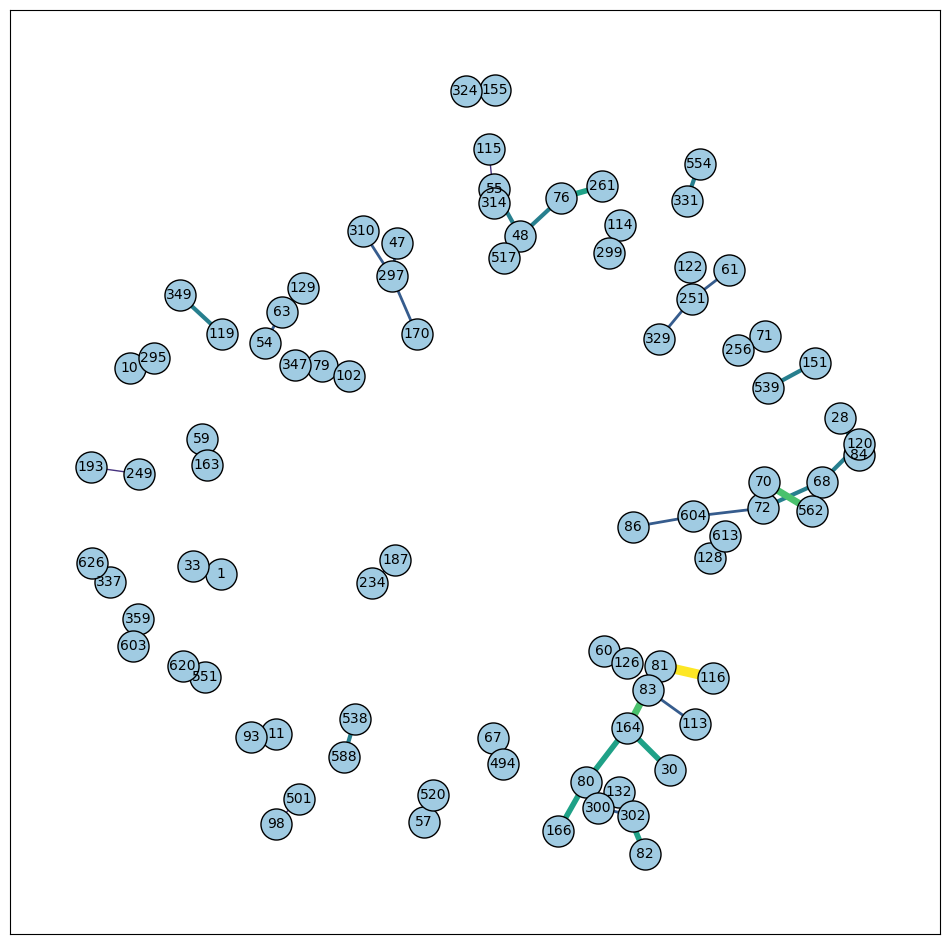

In [38]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
#pos = nx.spring_layout(G)

pos = nx.spring_layout(G, k=0.10, iterations=20, seed=63)

#viz = nx.draw_networkx(G, 
#                       pos, 
#                       with_labels=True, node_size=300,font_size=10)

# Show it as an interactive plot!
plt.figure(1, figsize=(12,12)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=500,
                 font_size=10,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2",
                 edge_color=edge_colors,
                 edge_cmap=plt.cm.viridis,
                 edge_vmin=0, edge_vmax=np.max(edge_colors))

#labels = nx.get_edge_attributes(G,'Weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#nx.draw_networkx_nodes(G, pos=pos)
#nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=0, edge_vmax=np.max(edge_colors), width=5)
#nx.draw_networkx_labels(G, pos=pos);

plt.show()

# Go with this one

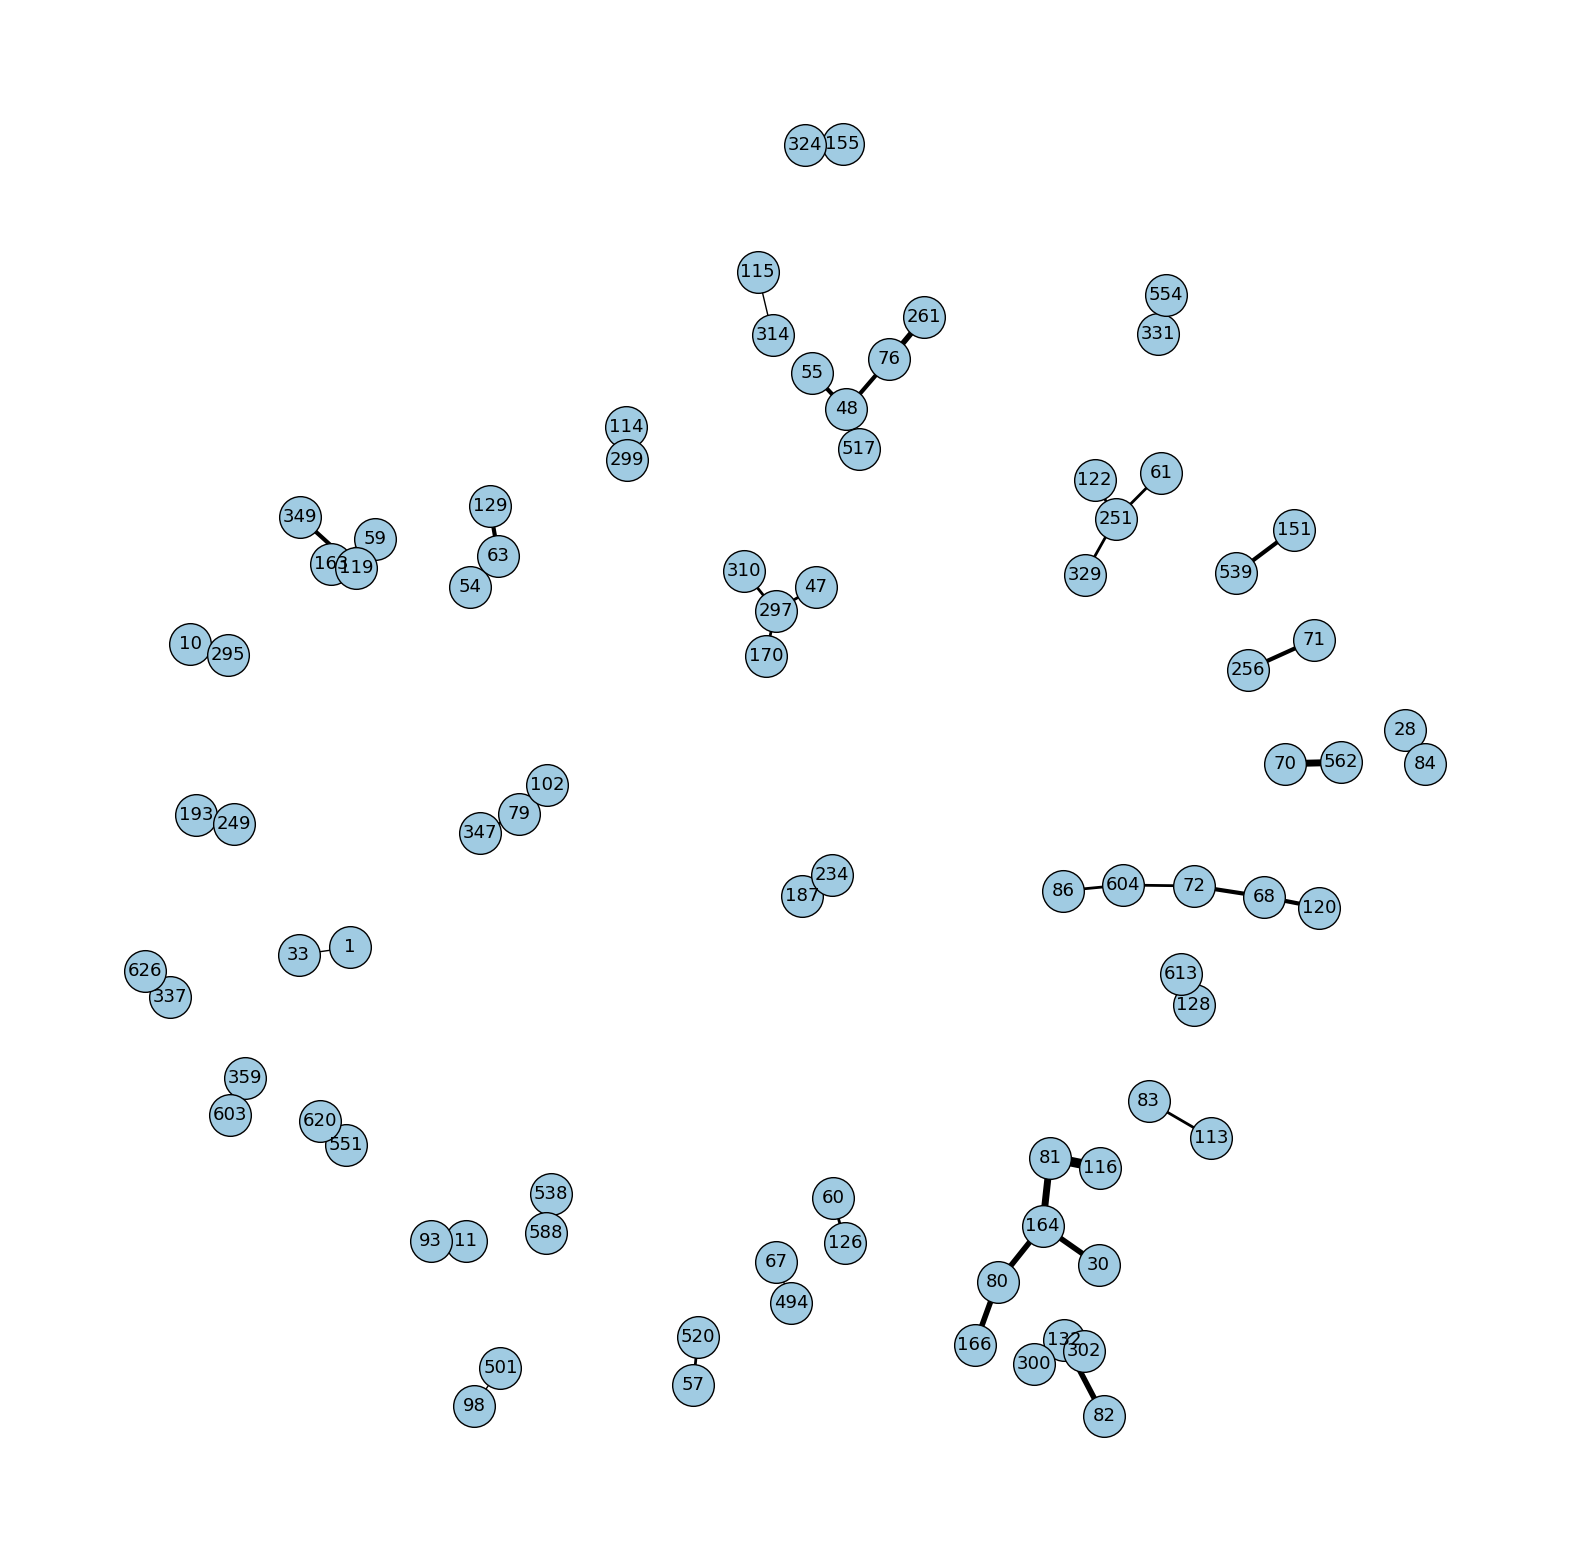

In [39]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
#pos = nx.spring_layout(G)

pos = nx.spring_layout(G, k=0.08, iterations=20, seed=63)

#viz = nx.draw_networkx(G, 
#                       pos, 
#                       with_labels=True, node_size=300,font_size=10)

# Show it as an interactive plot!
plt.figure(1, figsize=(20,20)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=600*1.5,
                 font_size=10*1.3,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2")

#labels = nx.get_edge_attributes(G,'Weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#nx.draw_networkx_nodes(G, pos=pos)
#nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=0, edge_vmax=np.max(edge_colors), width=5)
#nx.draw_networkx_labels(G, pos=pos);
plt.axis("off")

plt.savefig("REM2_BGM.png")
         
plt.show()

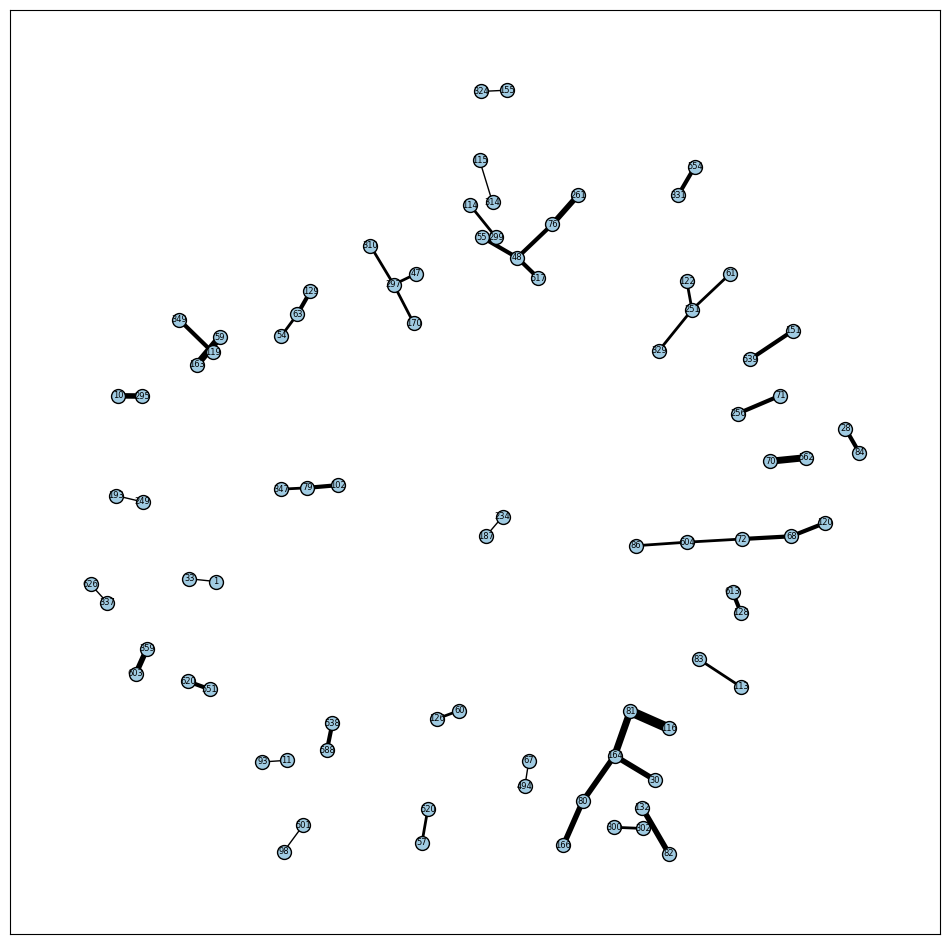

In [40]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
#pos = nx.spring_layout(G)

pos = nx.spring_layout(G, k=0.09, iterations=20, seed=63)

#viz = nx.draw_networkx(G, 
#                       pos, 
#                       with_labels=True, node_size=300,font_size=10)

# Show it as an interactive plot!
plt.figure(1, figsize=(12,12)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=100,
                 font_size=6,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2")

#labels = nx.get_edge_attributes(G,'Weight')
#nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#nx.draw_networkx_nodes(G, pos=pos)
#nx.draw_networkx_edges(G, pos=pos, edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=0, edge_vmax=np.max(edge_colors), width=5)
#nx.draw_networkx_labels(G, pos=pos);

plt.show()

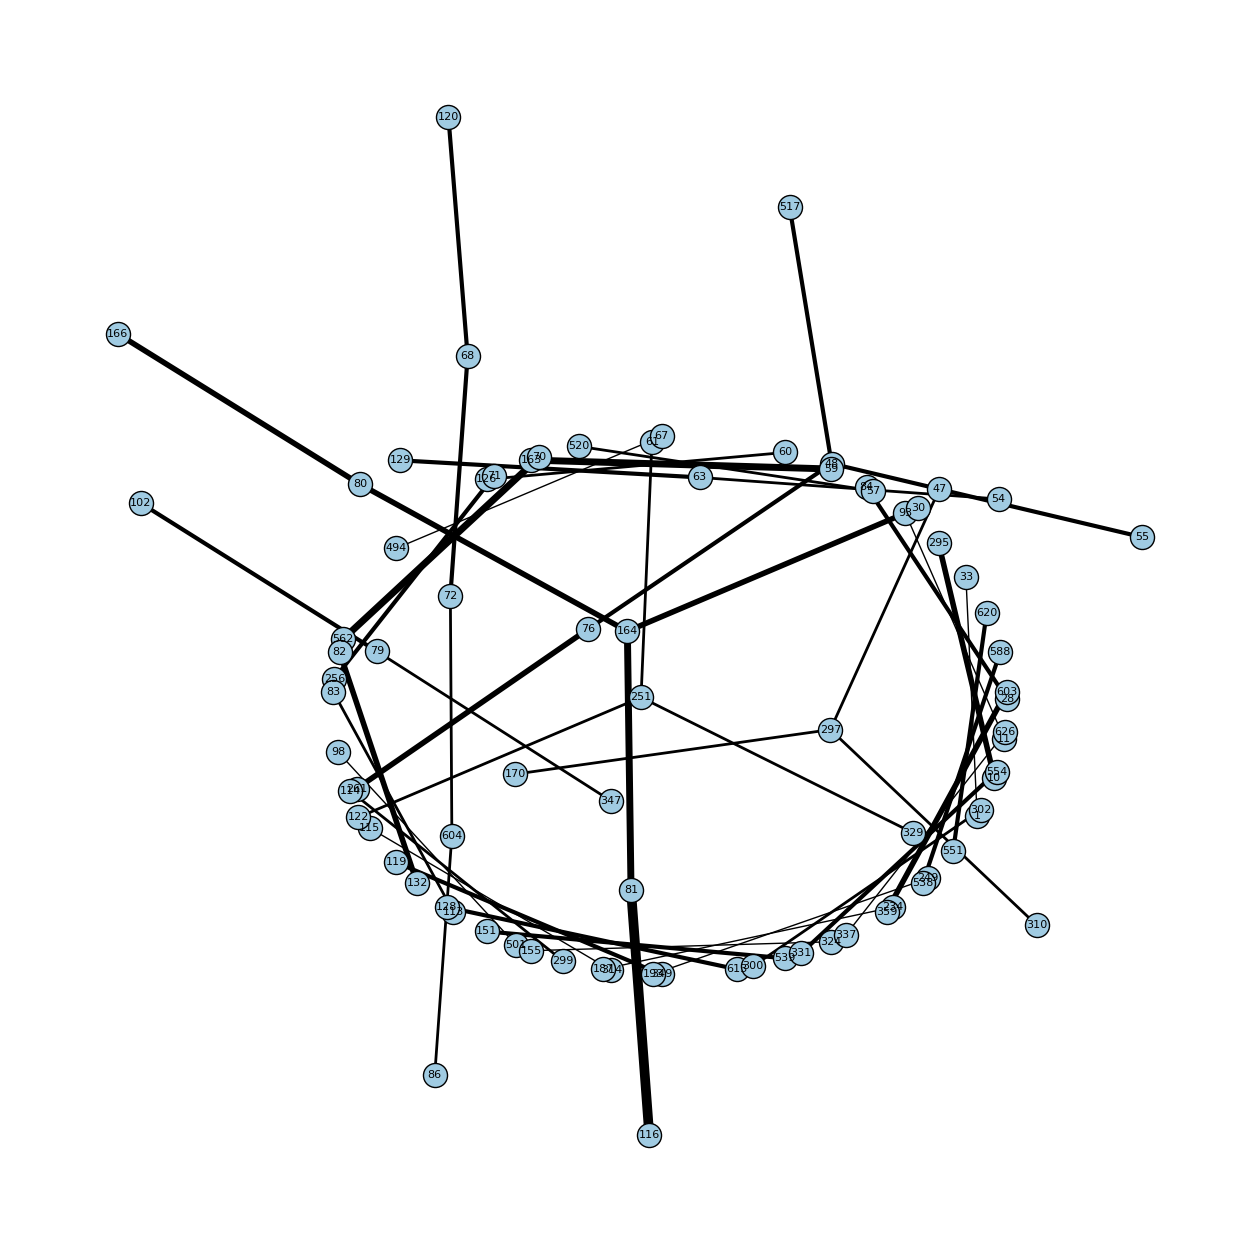

In [41]:
G  = nx.MultiDiGraph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

pos = nx.kamada_kawai_layout(G)

# Show it as an interactive plot!
plt.figure(1, figsize=(16,16)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]

nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=300,
                 font_size=8,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2")

#ax.margins(0.1, 0.05)
#fig.tight_layout()
plt.axis("off")
plt.show()

In [42]:
df4

,From,To,Weight,ProbS1andS2,HumanREM2_Site_1,HumanREM2_Site_2
25,1,33,1,0.561512,1.0,28.0
1660,10,295,4,0.735086,7.0,176.0
1827,11,93,1,0.753744,NaN,71.0
4971,28,84,3,0.712149,23.0,62.0
5494,30,164,4,0.576481,25.0,142.0
7136,47,297,2,0.599403,30.0,178.0
7250,48,55,3,0.719936,31.0,36.0
7268,48,76,3,0.578140,31.0,54.0
7421,48,517,3,0.873273,31.0,267.0
8151,54,63,2,0.504321,35.0,43.0


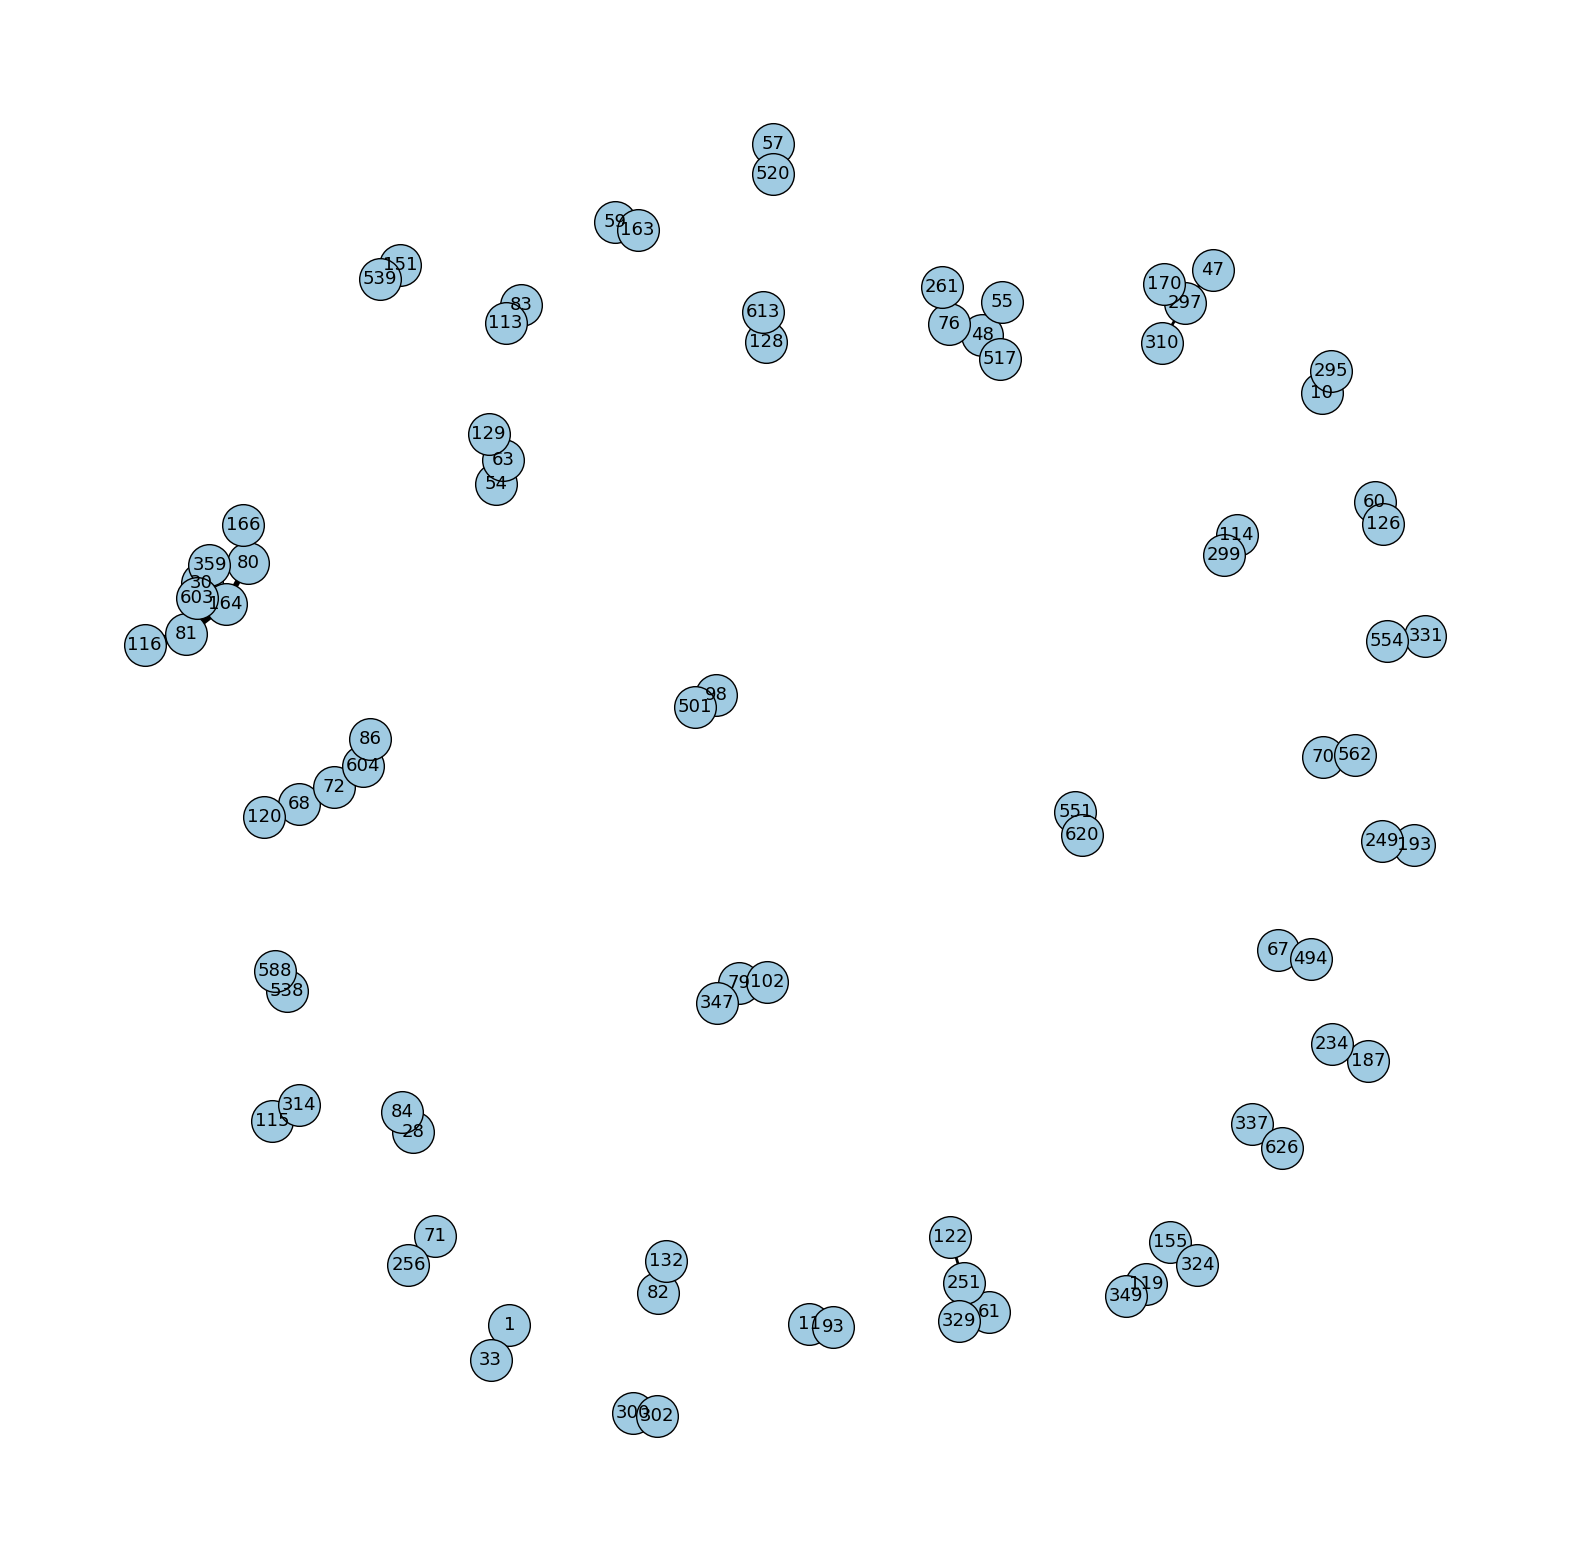

In [46]:
#G = nx.Graph()
#G = nx.path_graph()

G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

# Compute positions for viz.
pos = nx.spring_layout(G)

#pos = nx.spring_layout(G, k=0.08, iterations=20, seed=63)

# Show it as an interactive plot!
plt.figure(1, figsize=(20,20)) 

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]


nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=600*1.5,
                 font_size=10*1.3,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2")

plt.axis("off")

plt.savefig("REM2_BGM.png")
         
plt.show()

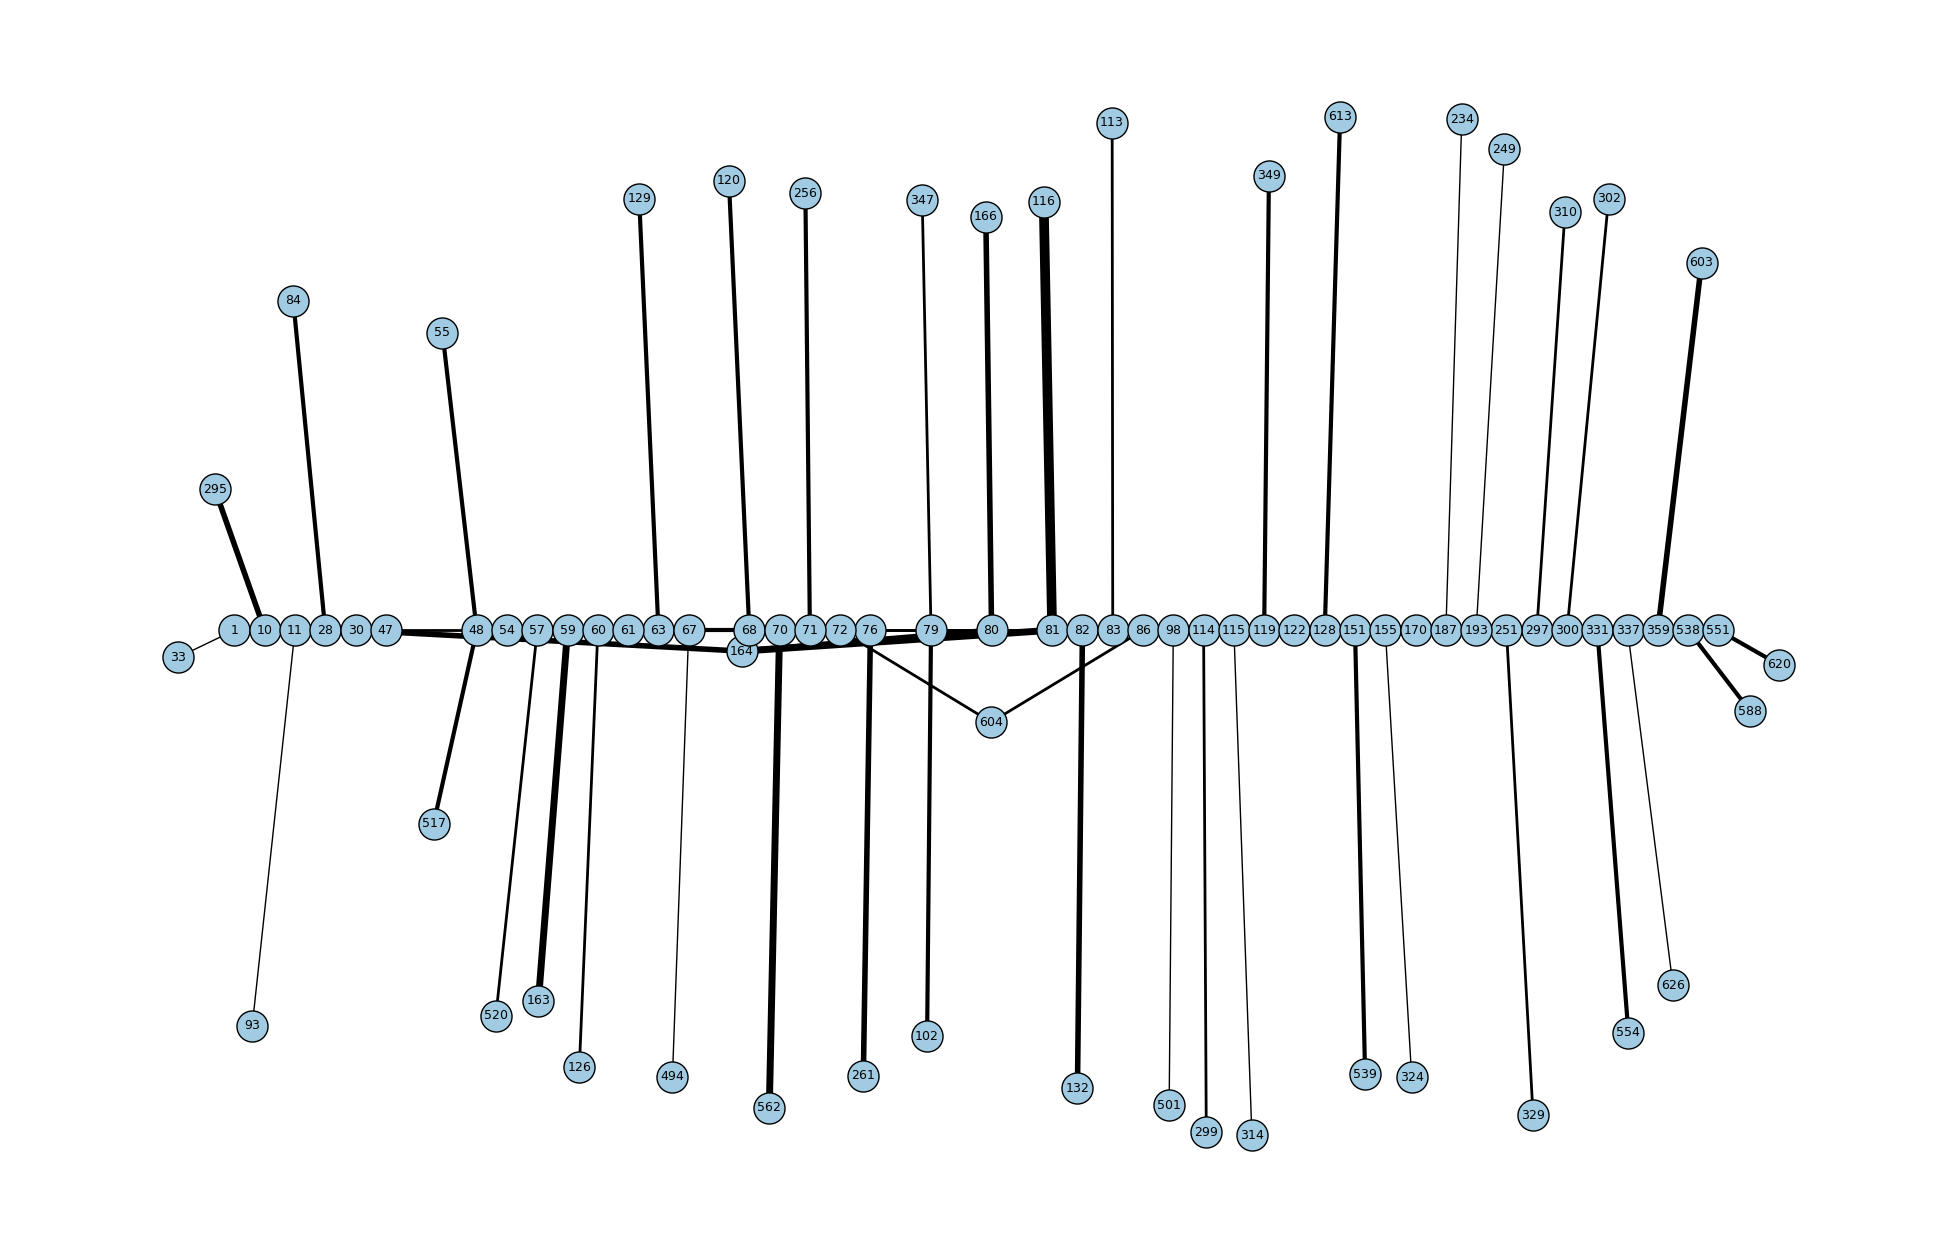

In [104]:
pos = [0, 0]
fixed_pos = {}
for item in sorted(df4["From"].tolist()):
    fixed_pos[item] = tuple(pos)
    pos[0] += 3
fixed_nodes = fixed_pos.keys()

G = nx.Graph()
G = nx.from_pandas_edgelist(df4, 'From', 'To', edge_attr=["Weight"])

pos = nx.spring_layout(G, 
                       scale=2.0, k=2.5,
                       seed=631, 
                       pos=fixed_pos, 
                       fixed=fixed_nodes)

# Show it as an interactive plot!
plt.figure(1, figsize=(25, 16))  # Width, height

weights = [1 if G[u][v] == {} else G[u][v]['Weight'] for u,v in G.edges()]

# extract the edge weight
edge_colors = [a['Weight'] for u,v, a in G.edges(data=True)]

nx.draw_networkx(G, 
                 pos, 
                 with_labels=True, 
                 node_size=500,
                 font_size=9,
                 font_weight='normal',
                 edgecolors="black",
                 width = weights,
                 node_color = "#A0CBE2")

plt.axis("off")
plt.savefig('REM2-BGM.svg')
plt.savefig('REM2-BGM.png')
plt.show()